In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import scale
import sklearn
%matplotlib inline

In [2]:
trip_dataset = pd.read_csv('../Datasets/trip_dataset.csv')

In [3]:
trip_dataset.shape

(36461, 21)

In [4]:
x = trip_dataset[['pickup_longitude','pickup_latitude','dropoff_longitude',
                 'dropoff_latitude','pickup_datetime_int','rain','temp','snow','windspeed','distance']].fillna(0)

#x = scale(x)

In [5]:
trip_dataset['trip_duration'] = np.log(trip_dataset['trip_duration'])
y = trip_dataset['trip_duration']

In [6]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostRegressor()

In [7]:
results = model_selection.cross_val_score(model, x, y, cv=kfold,scoring='neg_mean_squared_error',n_jobs=4)
Y_pred =  model_selection.cross_val_predict(model, x, y, cv=kfold,n_jobs=4)
print(np.sqrt(abs(results.mean())))

0.448440835007


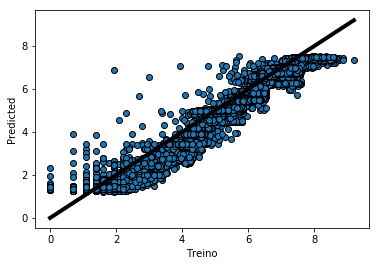

In [8]:
#http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html#sphx-glr-auto-examples-plot-cv-predict-py
fig, ax = plt.subplots()
ax.scatter(y, Y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k-', lw=4)
ax.set_xlabel('Treino')
ax.set_ylabel('Predicted')
plt.show()